In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env
from IPython.display import clear_output
import time
from copy import deepcopy
from ray import tune
from stable_baselines.common.callbacks import BaseCallback

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

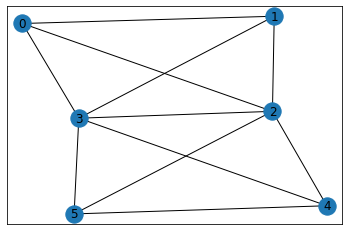

In [3]:
d = defaultdict(list)
"""Larger network"""
#data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10),(4,10)]#(4,6),(5,10),(6,10),(9,6),(8,10)]
"""Smaller netowrk"""
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw_networkx(G)

In [4]:
env = gym.make('wmac-graph-v0',graph=G)

In [5]:
model = A2C.load("a2c_wmac_small_tuned")

obs = env.reset()
count = 0
while count < 5000:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    #env.render()
    count = count + 1
    #time.sleep(3)
    clear_output(wait = True)
    if done:
        #env.render()
        break